# Data Gathering

In [472]:
import pandas as pd

In [473]:
twit_archive = pd.read_csv('twitter-archive-enhanced.csv')
twit_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [474]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    
response = requests.get(url)

In [475]:
# Download and save the file

with open('image_pred.tsv', mode='wb') as file:
    file.write(response.content)

In [476]:
image_pred = pd.read_csv('image_pred.tsv',sep='\t')
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [477]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [424]:
import glob
import json

df_tweets = []

for tweet in glob.glob('tweet_json.txt'):
    with open(tweet, encoding='utf-8') as file:
        tweet_id = [json.loads(line)['id'] for line in open('tweet-json (1).txt', 'r')]
        fave_count = [json.loads(line)['favorite_count'] for line in open('tweet-json (1).txt', 'r')]
        retweet_count = [json.loads(line)['retweet_count'] for line in open('tweet-json (1).txt', 'r')]
        language = [json.loads(line)['lang'] for line in open('tweet-json (1).txt', 'r')]
        
        #zip the lists to df_zipped
    df_zipped = list(zip(tweet_id, fave_count, retweet_count, language))

#creeate dataframe from zipped file
df_tweet = pd.DataFrame(df_zipped, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'language'])

In [425]:
df_tweet.head()

,tweet_id,favorite_count,retweet_count,language
0,892420643555336193,39467,8853,en
1,892177421306343426,33819,6514,en
2,891815181378084864,25461,4328,en
3,891689557279858688,42908,8964,en
4,891327558926688256,41048,9774,en


# Visual and Programmatic Assessment

In [426]:
twit_archive.info(), image_pred.info(), df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

(None, None, None)

* This gives a general overview of key information such as the shape of the dataframe, the datatypes of each column, and the number of non-null values.
* Of the three dataframes, only the `twit_archive` dataframe contains null values and requires most cleaning based on the info generated above. There are also *datatype* errors for columns in the tables

In [427]:
twit_archive.duplicated().sum(), image_pred.duplicated().sum(), df_tweet.duplicated().sum()

(0, 0, 0)

* These returns the number of duplicated rows in the datframe. This information is important for ensuring the each observation is represented only once. 
* None of the three dataframes have duplicated rows.

In [428]:
twit_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
2039,671547767500775424,NaN,NaN,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,None,None,None,None
1101,735635087207878657,NaN,NaN,2016-05-26 00:54:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735635087...,11,10,Dakota,None,None,None,None
2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None


* This returns a random sample of the rows of the specified dataframe. This allows for assessment of the hidden parts in a pandas dataframe, and detecting errors visually by leveraging programmatic syntaxes.

* Along with the null values, there are columns containing 'None', wrong information, etc. Some of these columns are: `name`, `rating_numerator`, etc.

### Quality Issues

* The **tweet_id** column in three dataframes are in the wrong format.
* `twit_archive` table contains some retweets. Only original tweets should be kept.
* `twit_archive` table contains some replies. Only original tweets should be kept.
* The *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, expanded_urls, retweeted_status_timestamp, source and retweeted_status_user_id* columns in the `twit_archive` table are mostly null and are not informative.
* The *dog_stage* group names should be uniform.
* The **name** column in `twit_archive` have the string value 'None' instead of null values.
* The **timestamp** column format in `twit_archive` table should be in datetime format.
* The *rating_numerator* in the df_twitter_archive were extracted incorrectly and the data type should be float.
* *name* column contains random values that are neither names nor null values.
* The dog breed predictions *p1* in the `image_pred` table contain "_".


### Tidiness
`twit_archive`
* The dog stages should be in one column as column values.
* The three tables should be pooled into one to have the most informative analyses.


# Data Cleaning 


In [429]:
# Make copies of original pieces of data
twit_archive_clean = twit_archive.copy()
image_pred_clean = image_pred.copy()
df_tweet_clean = df_tweet.copy()

### Quality Issue 1: The **tweet_id** column in three dataframes are in the wrong format.

#### Define: Convert the *tweet_id* in `df_tweet_clean` and `twit_archive` to object.

* Code

In [430]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype('str')
twit_archive_clean.tweet_id = twit_archive_clean.tweet_id.astype('str')
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(('str'))

* Test

In [431]:
df_tweet_clean.info(), twit_archive_clean.info(), image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   language        2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_s

(None, None, None)

### Quality Issue 2: `twit_archive` table contains some retweets. Only original tweets should be kept.

#### Define: Remove the rows that are retweets.

* Code

In [432]:
twit_archive_clean = twit_archive_clean[~(twit_archive_clean['text'].str.contains('RT'))]

* Test

In [433]:
twit_archive_clean[(twit_archive_clean['text'].str.contains('RT'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue 3: `twit_archive` table contains some replies. Only original tweets should be kept.

#### Define: Remove the rows that are replies.

* Code

In [434]:
twit_archive_clean = twit_archive_clean[~(twit_archive_clean['text'].str.contains('@'))]

In [435]:
twit_archive_clean[(twit_archive_clean['text'].str.contains('@'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue 4: The *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, expanded_urls, retweeted_status_timestamp, source and retweeted_status_user_id* columns in the `twit_archive` table are mostly null and/or are not informative.

#### Define: Drop the *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id* columns from the `twit_archive` table.

* Code

In [436]:
twit_archive_clean = twit_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls',
                                                      'retweeted_status_timestamp', 'source'], axis=1)

In [437]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2078 non-null   object
 1   timestamp           2078 non-null   object
 2   text                2078 non-null   object
 3   rating_numerator    2078 non-null   int64 
 4   rating_denominator  2078 non-null   int64 
 5   name                2078 non-null   object
 6   doggo               2078 non-null   object
 7   floofer             2078 non-null   object
 8   pupper              2078 non-null   object
 9   puppo               2078 non-null   object
dtypes: int64(2), object(8)
memory usage: 178.6+ KB


### Quality Issue 5: The **name** column in `twit_archive` have the string value 'None' instead of null values.

#### Define: Replace the 'None' values with null values.
* Code

In [438]:
twit_archive_clean.name = twit_archive_clean.name.replace('None', np.nan)

<IPython.core.display.Javascript object>

* Test

In [439]:
twit_archive_clean[twit_archive_clean.name == 'None']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue 6: The **timestamp** column format in `twit_archive` table should be in datetime format.

#### Define: Change the data type from object to datetime.
* Code

In [440]:
twit_archive_clean.timestamp = pd.to_datetime(twit_archive_clean.timestamp)

* Test

In [441]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   object             
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   text                2078 non-null   object             
 3   rating_numerator    2078 non-null   int64              
 4   rating_denominator  2078 non-null   int64              
 5   name                1460 non-null   object             
 6   doggo               2078 non-null   object             
 7   floofer             2078 non-null   object             
 8   pupper              2078 non-null   object             
 9   puppo               2078 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 178.6+ KB


### Quality Issue 7: The *rating_numerator* in the df_twitter_archive were extracted incorrectly and the data type should be float.

#### Define: Extract and replace the values of the *rating_numerator* column and change the data type.
* Code

In [442]:
twit_archive_clean.rating_numerator = twit_archive_clean.text.str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0].astype(float)

* Test

In [443]:
twit_archive_clean[twit_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\OluBunmi\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [444]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   object             
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   text                2078 non-null   object             
 3   rating_numerator    2078 non-null   float64            
 4   rating_denominator  2078 non-null   int64              
 5   name                1460 non-null   object             
 6   doggo               2078 non-null   object             
 7   floofer             2078 non-null   object             
 8   pupper              2078 non-null   object             
 9   puppo               2078 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 178.6+ KB


### Quality Issue 8: *name* column contains random values that are not names, and null values, also.

#### Define: Remove all rows in the name column with null values and lower case names
* Code


In [445]:
# .lower() because these non-name values are usually in lowercase form
twit_archive_clean.name.replace(np.NaN, '', inplace=True)
twit_archive_clean = twit_archive_clean[~(twit_archive_clean.name.str.islower())]

<IPython.core.display.Javascript object>

* Test

In [446]:
twit_archive_clean.name.str.islower().sum(), twit_archive_clean.name.isnull().sum()

(0, 0)

### Quality Issue 9: The dog breed predictions *p1* in the `image_pred` table contain "_" and the *tweet_id* type shoulg be string.

#### Define: Replace '_' with ' ' and convert data type to string
* Code


In [447]:
image_pred_clean = image_pred_clean[image_pred_clean.p1_dog == True]
image_pred_clean.p1 = image_pred_clean.p1.str.replace('_', ' ')

In [448]:
# The Confidence of the #1 prediction of the algorithms looks to be the highest and will be used for further analyses
image_pred_clean = image_pred_clean.iloc[:, :4]
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher


### Tidiness Issue 1: The dog stages in the `twit_archive_clean` dataframe should be in one column as column values.

#### Define: Drop the *doggo, floofer, pupper and puppo* columns and create a new column *dog_stage* from the *text* column.
* Code

In [449]:
twit_archive_clean['doggo'] = twit_archive_clean['doggo'].str.replace('None', '')
twit_archive_clean['floofer'] = twit_archive_clean['floofer'].str.replace('None', '')
twit_archive_clean['pupper'] = twit_archive_clean['pupper'].str.replace('None', '')
twit_archive_clean['puppo'] = twit_archive_clean['puppo'].str.replace('None', '')

In [450]:
twit_archive_clean['dog_stage'] = twit_archive_clean.doggo + twit_archive_clean.floofer + twit_archive_clean.pupper + twit_archive_clean.puppo

In [451]:
twit_archive_clean.loc[twit_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twit_archive_clean.loc[twit_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twit_archive_clean.loc[twit_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [452]:
twit_archive_clean = twit_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

* Test

In [453]:
twit_archive_clean['dog_stage'].value_counts()

                  1659
pupper             209
doggo               66
puppo               23
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Tidiness Issue 2: The three tables should be pooled into one to have the most informative analyses

#### Define: Remove all rows in the name column with null values and lower case names
* Code

In [454]:
twit_archive_clean = pd.merge(left=twit_archive_clean,
                                 right=df_tweet_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [455]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1975 non-null   object             
 1   timestamp           1975 non-null   datetime64[ns, UTC]
 2   text                1975 non-null   object             
 3   rating_numerator    1975 non-null   float64            
 4   rating_denominator  1975 non-null   int64              
 5   name                1975 non-null   object             
 6   dog_stage           1975 non-null   object             
 7   favorite_count      1975 non-null   int64              
 8   retweet_count       1975 non-null   int64              
 9   language            1975 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 169.7+ KB


In [456]:
twit_archive_clean = pd.merge(left=twit_archive_clean,
                                 right=image_pred_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [457]:
twit_archive_clean.rename(columns = {'p1':'dog_breed'}, inplace = True)
twit_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,language,jpg_url,img_num,dog_breed
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,33819,6514,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,25461,4328,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,41048,9774,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10,,,20562,3261,en,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,,12041,2158,en,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller


### Quality Issue 10: The *dog_stage* group names should be uniform.

#### Define: Unify the stage values of the dog stages
* Code

In [458]:
twit_archive_clean.dog_stage = twit_archive_clean.dog_stage.str.replace('doggo', 'Doggo')
twit_archive_clean.dog_stage = twit_archive_clean.dog_stage.str.replace('Floofer', 'Floof')
twit_archive_clean.dog_stage = twit_archive_clean.dog_stage.str.replace('puppo', 'Puppo')
twit_archive_clean.dog_stage = twit_archive_clean.dog_stage.str.replace('pupper', 'Pupper')
twit_archive_clean.dog_stage = twit_archive_clean.dog_stage.str.replace('floof', 'Floof')

* Test

In [459]:
twit_archive_clean.dog_stage.unique()

array(['', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo, Puppo',
       'Doggo, Floofer', 'Doggo, Pupper'], dtype=object)

In [460]:
twit_archive_clean.shape

(1383, 13)

# Data Storing

In [461]:
twit_archive_clean.to_csv('twitter_archive_master.csv', index = False)

# Analyses and Visualizations

### What are the most common dog names?

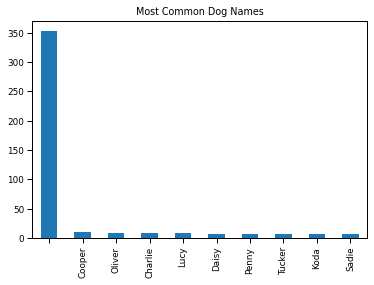

In [462]:
twit_archive_clean.name.value_counts()[:10].plot(kind='bar', title='Most Common Dog Names');

<AxesSubplot:title={'center':'Most Common Dog Names'}>

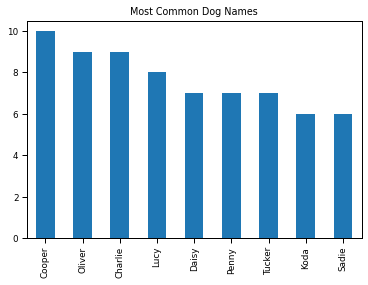

In [463]:
# Without the absent names

twit_archive_clean.name.value_counts()[:10].drop('').plot(kind='bar', title='Most Common Dog Names')

<AxesSubplot:title={'center':'Least Common Dog Names'}>

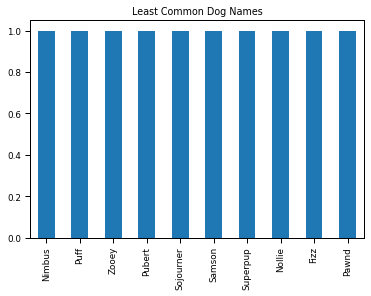

In [464]:
twit_archive_clean.name.value_counts()[-10:].plot(kind='bar', title='Least Common Dog Names')

### What names are the most favorited and retweeted (most popular)?

C:\Users\OluBunmi\AppData\Local\Temp/ipykernel_16128/483507096.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twit_archive_clean.groupby('name')['retweet_count','favorite_count'].sum().sort_values(by='retweet_count',
C:\Users\OluBunmi\AppData\Local\Temp/ipykernel_16128/483507096.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twit_archive_clean.groupby('name')['retweet_count','favorite_count'].sum().sort_values(by='retweet_count',


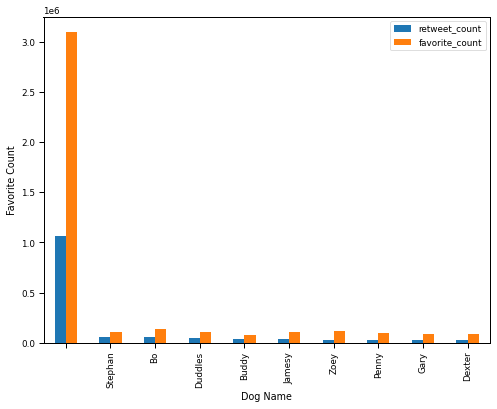

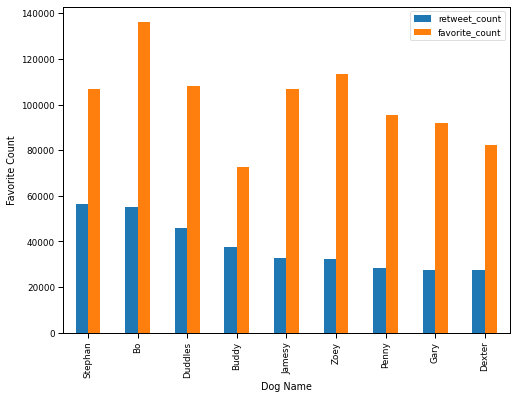

In [465]:
twit_archive_clean.groupby('name')['retweet_count','favorite_count'].sum().sort_values(by='retweet_count',
                        ascending=False)[:10].plot(kind='bar', figsize=(8, 6),
                       xlabel='Dog Name', ylabel='Favorite Count');

twit_archive_clean.groupby('name')['retweet_count','favorite_count'].sum().sort_values(by='retweet_count',
                        ascending=False)[:10].drop('').plot(kind='bar', figsize=(8, 6),
                       xlabel='Dog Name', ylabel='Favorite Count');

### What dog stage is the most common?

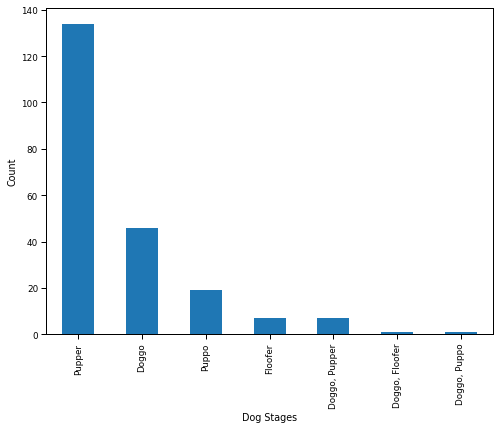

In [466]:
twit_archive_clean.dog_stage.value_counts().drop('').plot(kind='bar', figsize=(8, 6),
                        xlabel='Dog Stages', ylabel='Count');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

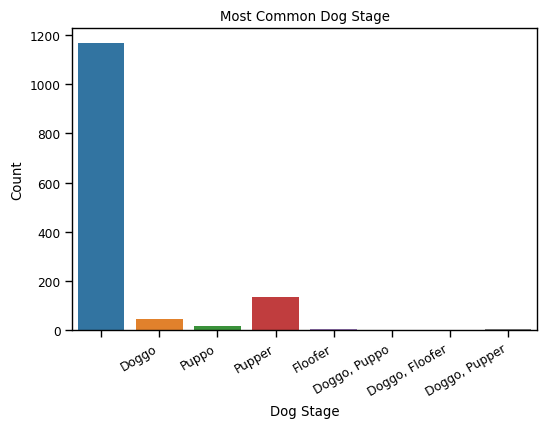

In [467]:
plt.figure(figsize=(6, 4), dpi=100)
sns.countplot(x = twit_archive_clean.dog_stage);
plt.xlabel('Dog Stage');
plt.ylabel('Count');
plt.title('Most Common Dog Stage')
plt.xticks(ha='right', rotation=30);

### What is the relationship between Favorites and Retweets?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

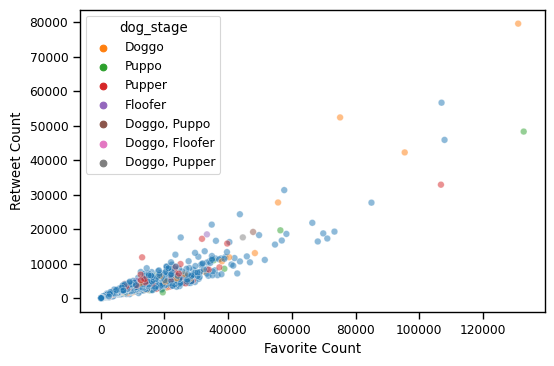

In [468]:
plt.figure(figsize=(6, 4), dpi=100)
sns.set_context('paper')
sns.scatterplot(x='favorite_count', y='retweet_count', data=twit_archive_clean, alpha=.5, hue='dog_stage');
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');

In [469]:
twit_archive_clean[['favorite_count', 'retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.910654
retweet_count,0.910654,1.000000


### What dog breeds are the **10** most popular based on retweet_count and favorite_count?

C:\Users\OluBunmi\AppData\Local\Temp/ipykernel_16128/623713037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twit_archive_clean.groupby('dog_breed')['retweet_count','favorite_count'].sum().sort_values(by='retweet_count',


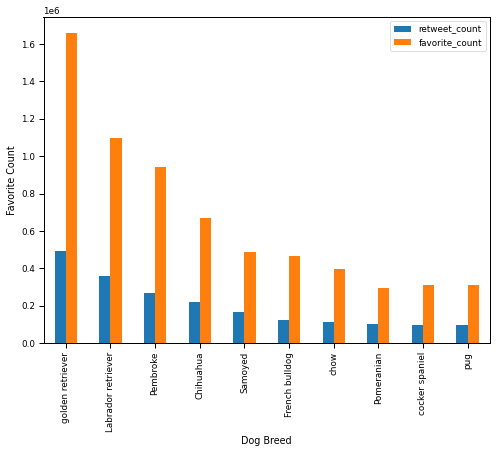

In [470]:
twit_archive_clean.groupby('dog_breed')['retweet_count','favorite_count'].sum().sort_values(by='retweet_count',
                        ascending=False)[:10].plot(kind='bar', figsize=(8, 6),
                        xlabel='Dog Breed', ylabel='Favorite Count');

### What dog stage is the most popular based on retweet_count and favorite_count?

C:\Users\OluBunmi\AppData\Local\Temp/ipykernel_16128/3465450024.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twit_archive_clean.groupby('dog_stage')['retweet_count', 'favorite_count'].sum().sort_values(by='retweet_count'
C:\Users\OluBunmi\AppData\Local\Temp/ipykernel_16128/3465450024.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twit_archive_clean.groupby('dog_stage')['retweet_count', 'favorite_count'].sum().sort_values(by='retweet_count'


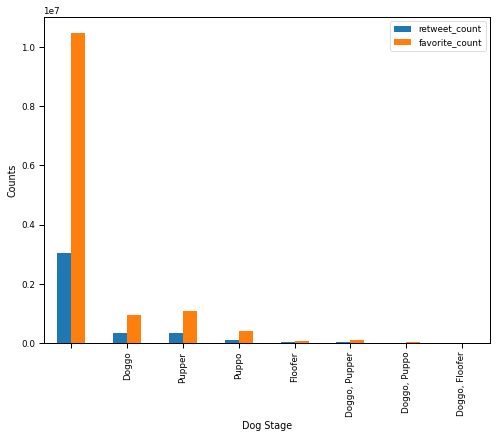

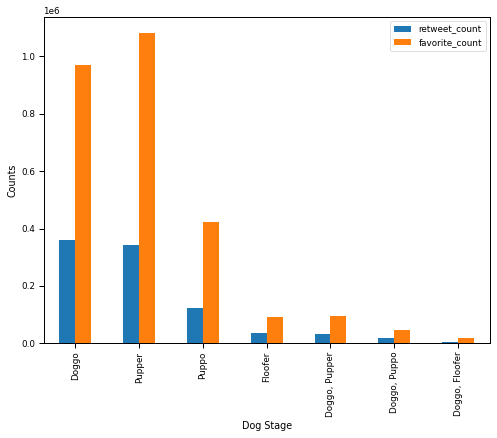

In [471]:
twit_archive_clean.groupby('dog_stage')['retweet_count', 'favorite_count'].sum().sort_values(by='retweet_count'
                           ,ascending=False)[:20].plot(figsize=(8, 6),
                            kind='bar', xlabel='Dog Stage', ylabel='Counts');

twit_archive_clean.groupby('dog_stage')['retweet_count', 'favorite_count'].sum().sort_values(by='retweet_count'
                           ,ascending=False)[:20].drop('').plot(figsize=(8, 6),
                            kind='bar', xlabel='Dog Stage', ylabel='Counts');

## Conclusions
> According to the collected data from the @WerateDogs twitter accounted;
* The most common dog name is Cooper, and Fizz and Superpup are some of the least popular names.
* The most favorited names were Bo and Zoey, while the most retweeted name is Stephan.
* Most of the rated dogs belonged to the Pupper stage.
* There is a high correlation between the *favorite count* and the *retweet_count* i.e. a WeRateDogs tweet is more likely to be favorited if its been retweeted and vice-versa.
* Overall, there were less retweets that favorites.
* Based on the favorites and retweets, the most popular *dog breed* is the **Golden Retriever** and the most popular *dog stage* is the **Pupper**.

## Limitations
* There were many missing values, making any analyses summarily inconclusive. Particularly for the `name` and `dog-stage` columns.

## Possible Future explorations
* Analysing the ratings for more insights.
* What is the most common time/day/month for the tweets.
* Possible approaches for filling the empty `name` and `dog_stage` columns.

## References
https://regexone.com/references/python

    
